# Importamos librerías a utilizar

In [3]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt
#Para leer desde un archivo
import pandas as pd 
import numpy as np
#Para generar errores aleatorios
import random

# Funciones para imprimir la informacion de la red
## ACTIVIDAD 1: Información general de la red
Coloque la función imprime_informacion que se creo en anteriores prácticas. Esta función imprime la información de la red. Recibe la red G e imprime el numero de nodos, numero de enlaces, diámetro, y densidad de la red G.

In [4]:
def imprime_informacion(G):
    # nodos
    n = len(nx.nodes(G))
    # enlaces
    m = len(nx.edges(G))
    # diametro
    d = nx.diameter(G)
    # densidad
    densidad = nx.density(G)
    print("Informacion de la red: \n- nodos = " + str(n) +
          "\n- enlaces = " + str(m) +
          "\n- diámetro = " + str(d) +
         "\n- densidad = " + str(densidad))
    # Devuelve informacion de la red
    s = nx.info(G)
    print(s)

## ACTVIDAD 2: Distribución de grados
Coloque la función grafica_distribucion_grados que se creo en anteriores prácticas. Esta funcion grafica la distribucion de grados y en este caso no devuelve nada. Recibe la red G y la variable nombre_dg. Cálcula, imprime y gráfica la distribución de grados. La gráfica la guarda en un archivo png con nombre almacenado en la variable nombre_dg. Devuleve la distribución de grados

In [5]:
def grafica_distribucion_grados(G, nombre_dg):
    dist_grados = nx.degree_histogram(G)
    print(dist_grados)
    plt.title("Distribucion de Grados")
    plt.plot(dist_grados) 
    plt.xlabel("grado")
    plt.ylabel("# nodos")
    plt.savefig(nombre_dg + ".png")
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()
    return dist_grados

# ACTIVIDAD 3: Mapa de calor por grado nodal
Coloque la función mapa_calor_grado que se creo en anteriores prácticas. Esta función gráfica el mapa de calor de la red G. Recibe como parámetros a la red G y la variable nombre_red. Grafica el mapa de calor y lo guarda en un archivo png con el nombre alamcenado en nombre_red.

In [6]:
def mapa_calor_grado(G, nombre_mcalor_grado):
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    mapa_color = plt.get_cmap('spring')
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label('Grado')
    plt.savefig(nombre_mcalor_grado + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

# Funciones para análizar la red sometida a fallos o ataques

## ACTIVIDAD 4: Número de componentes conectado

Complete la siguiente función llamada num_componentes_conectados. Esta función recibe como parámetro la red G y devuelve el número de componentes conectados de G. Utilizar los métodos ya diseñados en python para el calculo de componentes conectados de una red, ver https://networkx.org/documentation/stable/reference/algorithms/component.html. 

In [34]:
def num_componentes_conectados(G):
    num_cc=nx.number_connected_components(G)
    print("Numero de componentes conectados:"+str(num_cc))
    return num_cc

## ACTIVIDAD 5: Proporción del componente gigante

Complete la siguiente función llamada prop_componente_gigante que recibe como parámetro la red G y devuelve al proporción de nodos que tiene el componente gigante con respecto a los nodos que tiene G, este valor debe ser un número entre 0 y 1. Utilizar los métodos ya diseñados en python para el calculo de componentes conectados de una red, ver https://networkx.org/documentation/stable/reference/algorithms/component.html. Recuerde que la función len(A) le permite calcular el número de elementos en un conjunto o lista A.

In [41]:
def prop_componente_gigante(G):
    num_cc=num_componentes_conectados(G)
    Gcc =sorted(nx.connected_components(G), key=len, reverse=True)
    GC= G.subgraph(Gcc[0])
    n=len(nx.nodes(G))
    n_GC=len(nx.nodes(GC))
    pcg=n_GC/n
    print("La proporcion nodal entre Componente gigante y Red:"+str(pcg))
    return pcg

## ACTIVIDAD 6: Graficar dos funciones en una misma figura
Funcion que grafica dos funciones en una misma figura. Comente lo que ocurre en cada línea de código de la función

Parámetros:

1) titulo : texto

2) f1_valores: lista de numeros

3) f2_valores: lista de numeros

4) f1_leyenda: texto

5) f2_leyenda: texto

6) ejex_etiqueta: texto

7) ejey_etiqueta: texto

In [9]:
def grafica_funciones(titulo,f1_valores, f2_valores,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta):
    plt.title(titulo)#se agrega un titulo a la gráfica
    plt.plot(f1_valores, label=f1_leyenda)#se ingresa la lista de valores a graficar con su respectiva etiqueta
    plt.plot(f2_valores, label=f2_leyenda)#se ingresa la lista de valores a graficar con su respectiva etiqueta
    plt.xlabel(ejex_etiqueta)#se agrega una etiqueta al eje x
    plt.ylabel(ejey_etiqueta)#se agrega una etiqueta al eje y
    plt.legend()#agrega una leyenda a la gráfica que se sobrepondrá con los nombres de las etiquetas de los valores

# Funciones para simular de Errores

## ACTIVIDAD 7: Función para simular un error
Complete la función error(G) que simule un error en la red G. La función recibe una red G, elimina un nodo i aleatoreamente, puede utilizar el método choice de la librería random, vea https://www.w3schools.com/python/ref_random_choice.asp. La función devuelve la nueva red G (sin el nodo i)

In [10]:
def error(G):
    nodos=list(G.nodes)
    nodo_atacado=random.choice(nodos)
    G.remove_node(nodo_atacado)
    return G

## ACTIVIDAD 8: Función para simular varios errores secuenciales
Complete la función errores_secuenciales(G,num_errores) que recibe una red G y un entero "num_errores", el cuál indica la cantidad de errores que ocurrirán en la red. 

La función llama secuencialmente "num_errores" veces a la función error(G). Después de cada error almacena en un la lista "num_cc_lista" el número de componentes conectados de G y en otra lista la proporción del componente gigante "prop_cg_lista". Devuleve la tupla (num_cc_lista, prop_cg_lista). Debe utilizar a las funciones creadas en las actividades 4 y 5

In [32]:
def errores_secuenciales(G,num_errores):
    for i in range(num_errores):
        error(G)
        num_cc_lista.append(num_componentes_conectados(G))
        prop_gc_lista.append(prop_componente_gigante(G))
    return (num_cc_lista, prop_cg_lista)

# Funciones para simular de Ataques

## ACTIVIDAD 9: Función para obtener el nodo de grado más alto de una red
Complete la función nodo_mayor_grado(G) que recibe la red G y devuelve el nodo de mayor grado. 

In [60]:
def nodo_mayor_grado(G):
    grados_n = [val for (node, val) in G.degree()]
    sorted(grados_n,reverse=True)
    max_grado=max(grados_n)
    print("El grado más alto de la red es: "+str(max_grado))
    tupla_grados=G.degree()
    i=0
    for i,tuple in enumerate(tupla_grados):
        elemento1=tuple[0]
        elemento2=tuple[1]
        if elemento2==max_grado:
            print("el nodo con mayor grado es el nodo #:"+str(elemento1))
            nodo_max_grado=elemento1
    return nodo_max_grado

## ACTIVIDAD 10: Función para simular un ataque por grado nodal
Complete la función ataque_grado(G) que simule un ataque por grado nodal en la red G. La función recibe una red G, elimina el nodo i de más alto grado grado y devuelve la nueva red G (sin el nodo i). Debe utilizar la función de la actividad 9

In [54]:
def ataque_grado(G):
    nodos=list(G.nodes)
    nodo_atacado=nodo_mayor_grado(G)
    G.remove_node(nodo_atacado)
    return G

## ACTIVIDAD 11: Función para simular varios ataques (por grado nodal) secuenciales
Complete la función ataques_secuenciales(G,num_ataques). La función recibe una red G y un entero "num_ataques" que indica la cantidad de ataques que ocurrirán en la red. Secuencialmente llama "num_ataques" veces a la función ataque(G). Después de cada ataque almacena en una lista "num_cc_lista" el número de componentes conectados de G y en otra lista "prop_cg_lista" la proporción del componente gigante. Devuleve la tupla (num_cc_lista, prop_cg_lista).

In [58]:
def ataques_secuenciales(G,num_ataques):
    for i in range(num_ataques):
        ataque_grado(G)
        num_cc_lista.append(num_componentes_conectados(G))
        prop_gc_lista.append(prop_componente_gigante(G))
    return (num_cc_lista, prop_cg_lista)

# Evaluación de redes sometidas a errores - Red de escala libre vs. red de aleatoria

## ACTIVIDAD 12: Creación de una red de escala libre 
Creamos una red de escala libre Barabasi-Albert de 100 nodos y con parámetro m=5. Imprimos la información de rede

In [19]:
free_scale=nx.barabasi_albert_graph(100,5)
imprime_informacion(free_scale)

Informacion de la red: 
- nodos = 100
- enlaces = 475
- diámetro = 4
- densidad = 0.09595959595959595
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


## ACTIVIDAD 13: Creación de unaa red aleatoria
Creamos una red aleatoria Erdos-Renyi de 100 nodos y con parámetro p=0.1. Imprimos la información de la red

In [20]:
aleatoria_red=nx.erdos_renyi_graph(100,0.1)
imprime_informacion(aleatoria_red)

Informacion de la red: 
- nodos = 100
- enlaces = 524
- diámetro = 4
- densidad = 0.10585858585858586
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 524
Average degree:  10.4800


## ACTIVIDAD 14: Distribución de grados
Llama a la función para graficar las distribucion de grados de las redes creadas y guarda ambas imagenes. Cada función llamela en una celda separada de código para que así pueda visualizar ambas figuras

In [22]:
grafica_distribucion_grados(free_scale,"escala_libre")

[0, 0, 0, 0, 0, 28, 12, 17, 10, 2, 6, 3, 1, 2, 5, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2]


[0,
 0,
 0,
 0,
 0,
 28,
 12,
 17,
 10,
 2,
 6,
 3,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2]

<Figure size 432x288 with 0 Axes>

In [24]:
grafica_distribucion_grados(aleatoria_red,"red_aleatoria")

[0, 0, 1, 0, 2, 0, 3, 7, 12, 15, 10, 14, 13, 11, 1, 5, 5, 0, 1]


[0, 0, 1, 0, 2, 0, 3, 7, 12, 15, 10, 14, 13, 11, 1, 5, 5, 0, 1]

<Figure size 432x288 with 0 Axes>

## ACTIVIDAD 15: Mapas de calor por grado nodal
Llama a la función para graficar los mapas de calor por grado nodal de las redes creadas y guarda ambas imagenes. Cada función llamela en una celda separada de código para que así pueda visualizar ambas figuras

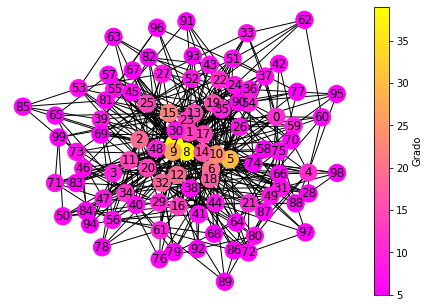

<Figure size 432x288 with 0 Axes>

In [25]:
mapa_calor_grado(free_scale,"calor_escala_libre")

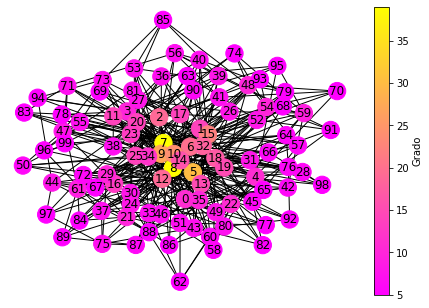

<Figure size 432x288 with 0 Axes>

In [26]:
mapa_calor_grado(free_scale,"calor_aleatoria")

## Simulación de errores secuenciales en la red de escala libre
Utilizando la función errores_secuenciales simula 99 errores en la red de escala libre. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante.

Note que la función errores_secuenciales recibe como paŕametro una copia de la red que se va a evaluar, esto es importante porque de otro modo se modificará la red original.

In [42]:
free_scale_test = free_scale.copy()
num_cc_lista=[]
prop_gc_lista=[]
(num_cc_lista,prop_gc_lista)=errores_secuenciales(free_scale_test, 99)

Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0


## ACTIVIDAD 16: Simulación de errores secuenciales en la red aleatoria
Utilizando la función errores_secuenciales simula 99 errores en la red aleatoria. Almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante.

In [48]:
aleatoria_red_test=aleatoria_red.copy()
num_cc_lista=[]
prop_gc_lista=[]
tupla_resultados=(num_cc_lista,prop_gc_lista)
tupla_resultados=errores_secuenciales(aleatoria_red_test, 99)

Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0


## ACTIVIDAD 17: Grafica de los componentes conectados vs. número de errores
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de errroes para las pruebas realizadas sobre la red de escala libre y la red aleatoria

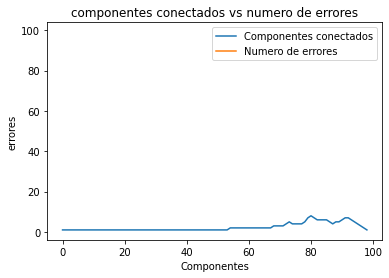

In [49]:
grafica_funciones("componentes conectados vs numero de errores",tupla_resultados[0],99,"Componentes conectados","Numero de errores","Componentes","errores")

## ACTIVIDAD 18: Grafica de la proporción del componente gigante vs. número de errores
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de errrores para las pruebas realizadas sobre la red de escala libre y la red aleatoria

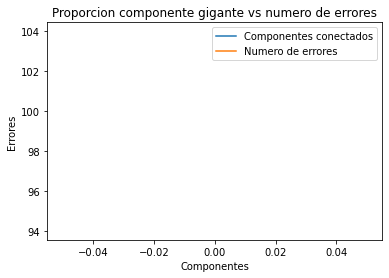

In [50]:
grafica_funciones("Proporcion componente gigante vs numero de errores",tupla_resultados[1],99,"Componentes conectados","Numero de errores","Componentes","Errores")

## ACTIVIDAD 19 Simulación de ataques (por grado nodal) secuenciales
Utilizando la función ataques_secuenciales simula 99 ataques en cada una de las red de escala libre. Recuerde pasar como parámetro de la función una copia de la red, así como guardar los resultados que devuelve la función.

In [61]:
free_scale_test2=free_scale.copy()
num_cc_lista=[]
prop_gc_lista=[]
tupla_resultados=(num_cc_lista,prop_gc_lista)
tupla_resultados=ataques_secuenciales(free_scale_test2, 99)

El grado más alto de la red es: 39
el nodo con mayor grado es el nodo #:7
el nodo con mayor grado es el nodo #:8
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
El grado más alto de la red es: 38
el nodo con mayor grado es el nodo #:7
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
El grado más alto de la red es: 28
el nodo con mayor grado es el nodo #:5
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
El grado más alto de la red es: 25
el nodo con mayor grado es el nodo #:9
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
El grado más alto de la red es: 22
el nodo con mayor grado es el nodo #:10
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal 

El grado más alto de la red es: 0
el nodo con mayor grado es el nodo #:22
el nodo con mayor grado es el nodo #:24
el nodo con mayor grado es el nodo #:26
el nodo con mayor grado es el nodo #:28
el nodo con mayor grado es el nodo #:29
el nodo con mayor grado es el nodo #:31
el nodo con mayor grado es el nodo #:36
el nodo con mayor grado es el nodo #:37
el nodo con mayor grado es el nodo #:39
el nodo con mayor grado es el nodo #:40
el nodo con mayor grado es el nodo #:41
el nodo con mayor grado es el nodo #:42
el nodo con mayor grado es el nodo #:43
el nodo con mayor grado es el nodo #:45
el nodo con mayor grado es el nodo #:47
el nodo con mayor grado es el nodo #:51
el nodo con mayor grado es el nodo #:52
el nodo con mayor grado es el nodo #:53
el nodo con mayor grado es el nodo #:55
el nodo con mayor grado es el nodo #:57
el nodo con mayor grado es el nodo #:60
el nodo con mayor grado es el nodo #:64
el nodo con mayor grado es el nodo #:66
el nodo con mayor grado es el nodo #:67
el nod

## ACTIVIDAD 20 Simulación de ataques (por grado nodal) secuenciales
Utilizando la función ataques_secuenciales simula 99 ataques en cada una de las red de escala libre. Recuerde pasar como parámetro de la función una copia de la red, así como guardar los resultados que devuelve la función.

In [62]:
aleatoria_red_test2=aleatoria_red.copy()
num_cc_lista=[]
prop_gc_lista=[]
tupla_resultados=(num_cc_lista,prop_gc_lista)
tupla_resultados=ataques_secuenciales(aleatoria_red_test2, 99)

El grado más alto de la red es: 18
el nodo con mayor grado es el nodo #:35
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
El grado más alto de la red es: 16
el nodo con mayor grado es el nodo #:2
el nodo con mayor grado es el nodo #:48
el nodo con mayor grado es el nodo #:65
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
El grado más alto de la red es: 16
el nodo con mayor grado es el nodo #:2
el nodo con mayor grado es el nodo #:48
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
El grado más alto de la red es: 16
el nodo con mayor grado es el nodo #:2
Numero de componentes conectados:1
Numero de componentes conectados:1
La proporcion nodal entre Componente gigante y Red:1.0
El grado más alto de la red es: 15
el nodo con mayor grado es el nodo #:22
el nodo 

## ACTIVIDAD 21 Grafica de los componentes conectados vs. número de errores
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de errrores para las pruebas realizadas sobre la red de escala libre y la red aleatoria

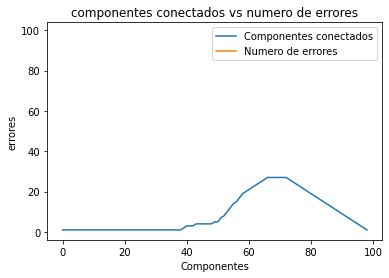

In [63]:
grafica_funciones("componentes conectados vs numero de errores",tupla_resultados[0],99,"Componentes conectados","Numero de errores","Componentes","errores")

## ACTIVIDAD 22: Grafica de la proporción del componente gigante vs. número de errores
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de errrores para las pruebas realizadas sobre la red de escala libre y la red aleatoria

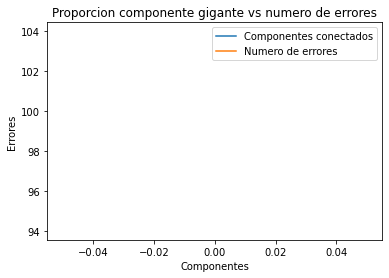

In [64]:
grafica_funciones("Proporcion componente gigante vs numero de errores",tupla_resultados[1],99,"Componentes conectados","Numero de errores","Componentes","Errores")